In [29]:
from src.utility.data_loader import loader as data_loader
from src.utility.config_loader import loader as config_loader
from src.utility.MLexception import MLException
from src.utility.logger import get_logger
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

warnings.filterwarnings("ignore", category=UserWarning)


In [17]:
data_path = config_loader.load("data.yaml")['data']['raw_data_path']
data_path

'raw/MachineLearningRating_v3.txt'

In [18]:
df = data_loader.load_csv(data_path,sep='|')
df

/home/ermias/Desktop/insurance/End-to-End_Insurance_Risk_Analytics_Predictive-Modeling/src/utility/data_loader.py:17: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, **kwargs)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [19]:
df.shape

(1000098, 52)

In [20]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [21]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [24]:
def quick_dtype_inspect(df):
    print("ROWS:", len(df))
    print("\nColumns & dtypes:\n", df.dtypes)
    display(df.head(3))
    print("\nMissing values (top 20):")
    print(df.isna().sum().sort_values(ascending=False).head(20))

quick_dtype_inspect(df)

ROWS: 1000098

Columns & dtypes:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     o

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



Missing values (top 20):
NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
Cylinders                      552
bodytype                       552
kilowatts                      552
NumberOfDoors                  552
VehicleIntroDate               552
dtype: int64


In [30]:
if "TransactionMonth" in df.columns:
    df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")
# numeric coercions for monetary fields
for col in ["TotalPremium", "TotalClaims", "CustomValueEstimate", "SumInsured", "CalculatedPremiumPerTerm"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [31]:
df['NumberOfVehiclesInFleet'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NumberOfVehiclesInFleet, dtype: float64

In [32]:
# cell 4 — derived metrics
# LossRatio = TotalClaims / TotalPremium (guard zero)
df["TotalPremium"] = df["TotalPremium"].replace({0: np.nan})
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
df["Profit"] = df["TotalPremium"] - df["TotalClaims"]
# You may want also claim severity = TotalClaims / claim_count if claim count exists
if "ClaimCount" in df.columns:
    df["ClaimSeverity"] = df["TotalClaims"] / df["ClaimCount"]
else:
    df["ClaimSeverity"] = np.nan

df[["TotalPremium", "TotalClaims", "LossRatio", "Profit"]].describe().T


,count,mean,std,min,25%,50%,75%,max
TotalPremium,618464.0,100.105362,286.235339,-782.576754,2.630161,7.274123,78.947368,65282.603421
TotalClaims,1000098.0,64.861190,2384.074695,-12002.412281,0.000000,0.000000,0.000000,393092.105263
LossRatio,618464.0,0.349885,9.286479,-18.700122,0.000000,0.000000,0.000000,2553.600000
Profit,618464.0,-0.261144,2967.991738,-392848.566930,2.578246,7.202895,78.947368,65282.603421


In [33]:
# cell 5 — portfolio-level
total_premium = df["TotalPremium"].sum(skipna=True)
total_claims = df["TotalClaims"].sum(skipna=True)
portfolio_loss_ratio = total_claims / total_premium
print(f"Total premium: {total_premium:,.2f}")
print(f"Total claims: {total_claims:,.2f}")
print(f"Portfolio Loss Ratio: {portfolio_loss_ratio:.4f}")


Total premium: 61,911,562.70
Total claims: 64,867,546.17
Portfolio Loss Ratio: 1.0477


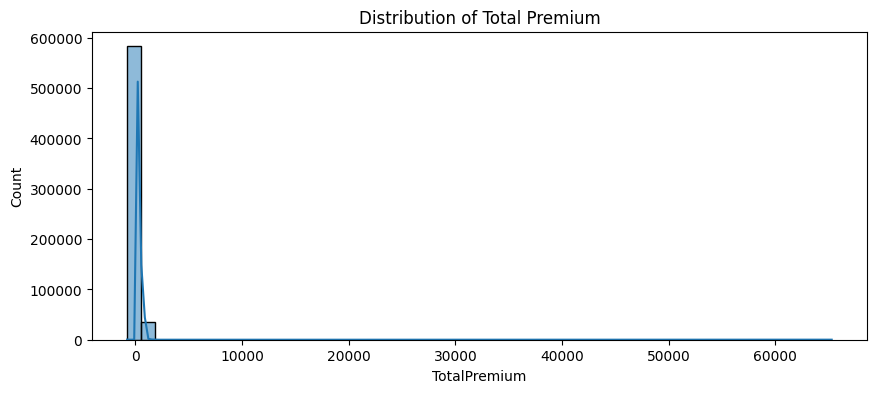

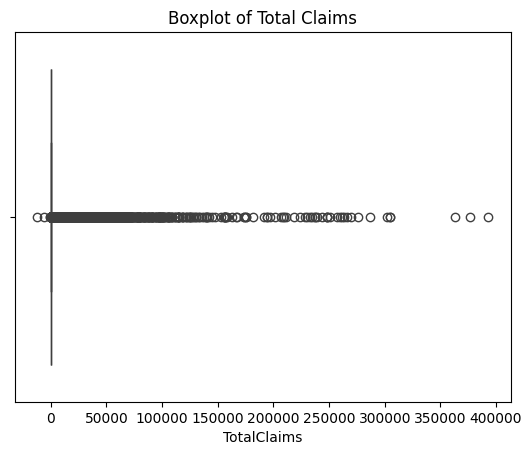

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title("Distribution of Total Premium")
plt.show()

sns.boxplot(x=df['TotalClaims'])
plt.title("Boxplot of Total Claims")
plt.show()


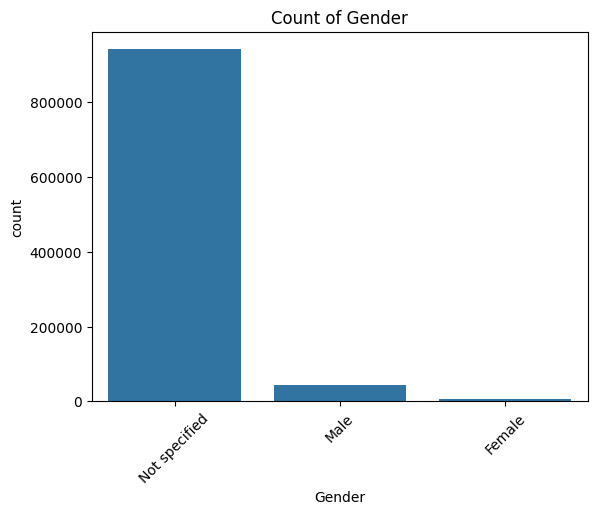

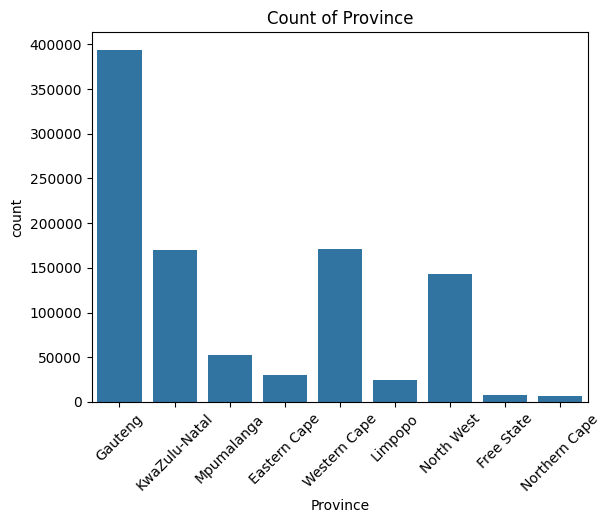

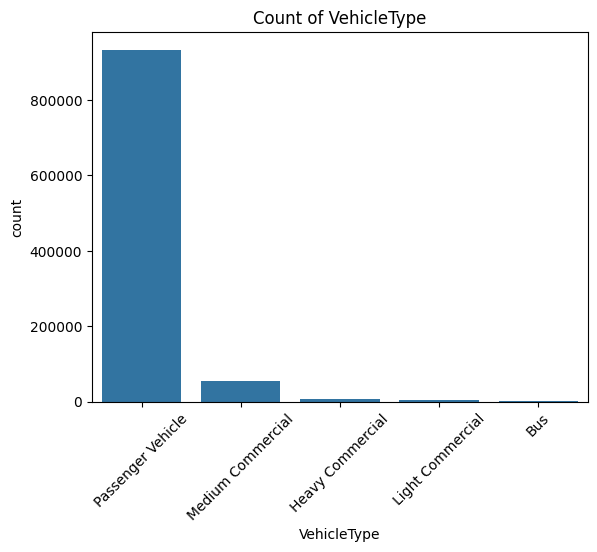

In [48]:
for col in ['Gender','Province','VehicleType']:
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


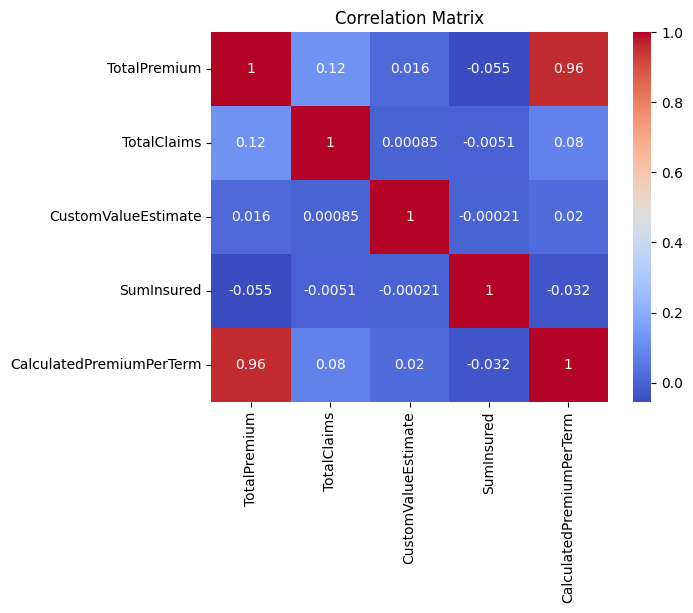

In [51]:
corr_cols = ['TotalPremium','TotalClaims','CustomValueEstimate','SumInsured','CalculatedPremiumPerTerm']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


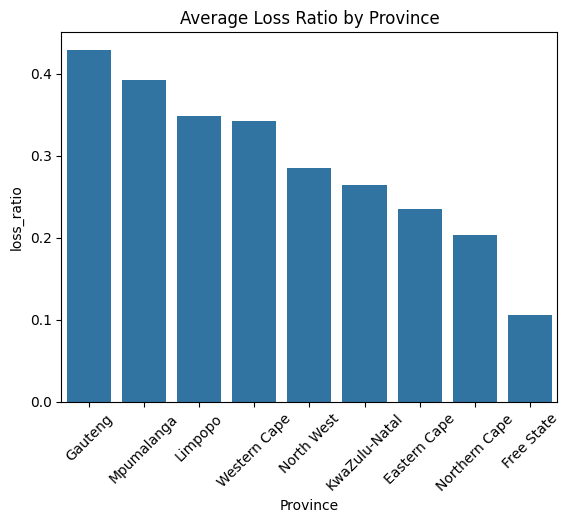

In [49]:
geo_agg = df.groupby('Province').agg(
    loss_ratio=('LossRatio','mean'),
    total_claims=('TotalClaims','sum')
).sort_values('loss_ratio', ascending=False)

sns.barplot(data=geo_agg, x=geo_agg.index, y='loss_ratio')
plt.title("Average Loss Ratio by Province")
plt.xticks(rotation=45)
plt.show()


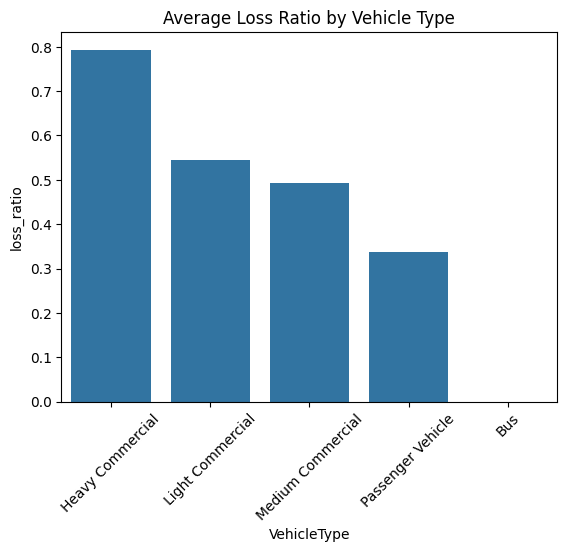

In [50]:
vehicle_agg = df.groupby('VehicleType').agg(
    loss_ratio=('LossRatio','mean'),
    total_claims=('TotalClaims','sum')
).sort_values('loss_ratio', ascending=False)

sns.barplot(data=vehicle_agg, x=vehicle_agg.index, y='loss_ratio')
plt.title("Average Loss Ratio by Vehicle Type")
plt.xticks(rotation=45)
plt.show()


,mean,median,count,std
Province,,,,
Gauteng,0.428889,0.0,240803,10.318233
Mpumalanga,0.392698,0.0,31663,8.323743
Limpopo,0.348712,0.0,18009,7.348495
Western Cape,0.341750,0.0,96775,12.773272
North West,0.285348,0.0,89799,6.623117
KwaZulu-Natal,0.264746,0.0,112142,5.790029
Eastern Cape,0.235589,0.0,19698,6.557520
Northern Cape,0.203831,0.0,3643,5.446448
Free State,0.106209,0.0,5932,3.803652


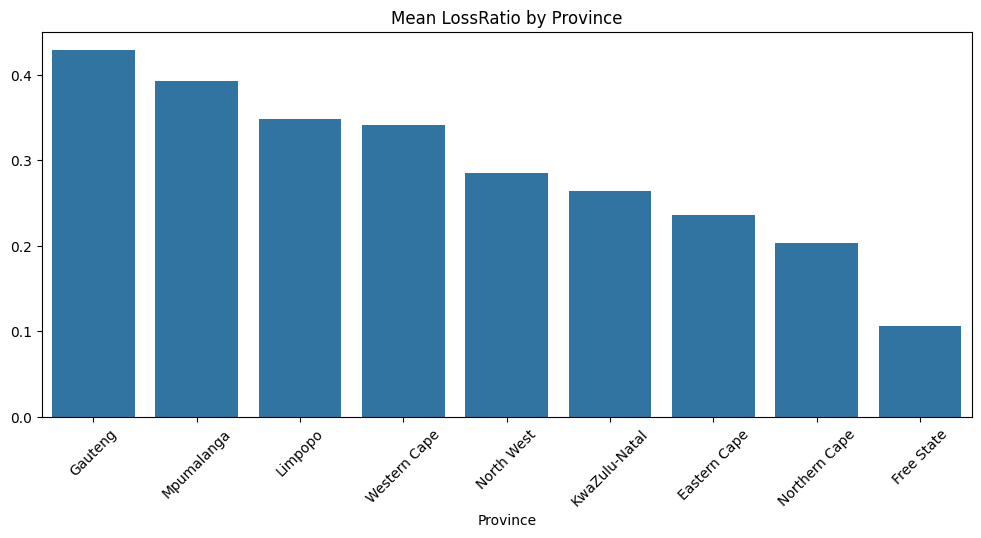

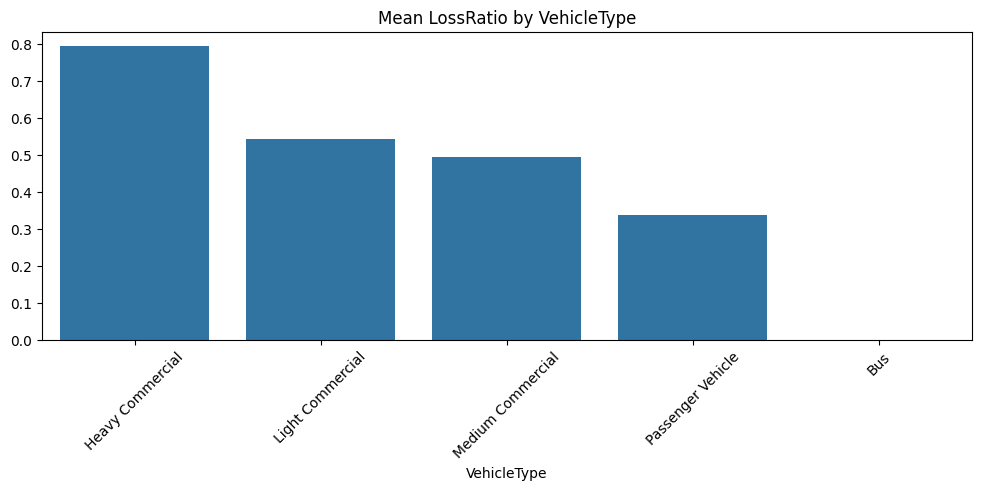

Gender
Female           0.491979
Male             0.348852
Not specified    0.347904
Name: LossRatio, dtype: float64


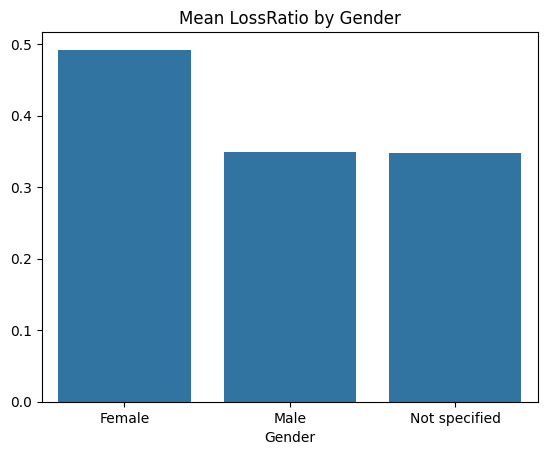

In [34]:
# cell 6 — aggregation functions
def group_stats(df, groupby_col, metric="LossRatio", agg=["mean","median","count","std"]):
    g = df.groupby(groupby_col)[metric].agg(agg).sort_values(("mean" if "mean" in agg else agg[0]), ascending=False)
    return g

# Province
if "Province" in df.columns:
    prov_stats = group_stats(df, "Province", metric="LossRatio", agg=["mean","median","count","std"])
    display(prov_stats.head(20))
    plt.figure(figsize=(12,5))
    prov_mean = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=False)
    sns.barplot(x=prov_mean.index, y=prov_mean.values)
    plt.xticks(rotation=45)
    plt.title("Mean LossRatio by Province")
    plt.show()

# VehicleType
if "VehicleType" in df.columns:
    veh_mean = df.groupby("VehicleType")["LossRatio"].mean().sort_values(ascending=False)
    plt.figure(figsize=(12,4))
    sns.barplot(x=veh_mean.index, y=veh_mean.values)
    plt.xticks(rotation=45)
    plt.title("Mean LossRatio by VehicleType")
    plt.show()

# Gender
if "Gender" in df.columns:
    gender_mean = df.groupby("Gender")["LossRatio"].mean().sort_values(ascending=False)
    print(gender_mean)
    sns.barplot(x=gender_mean.index, y=gender_mean.values)
    plt.title("Mean LossRatio by Gender")
    plt.show()


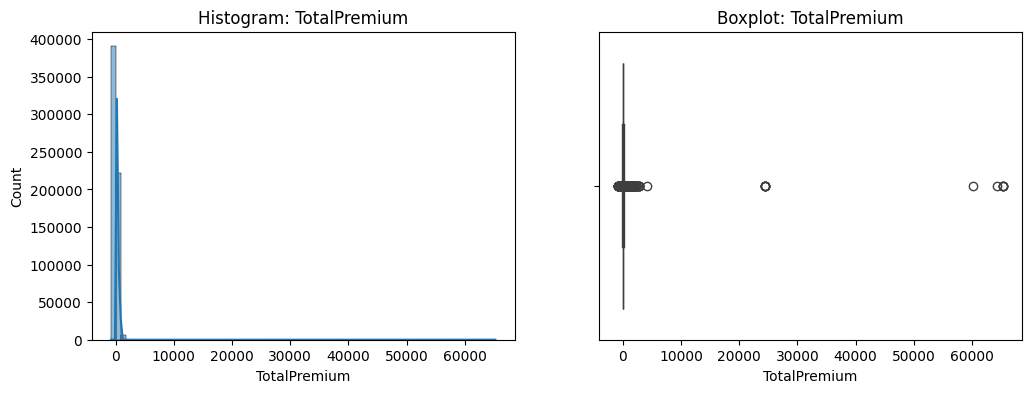

TotalPremium skewness: 116.31, 99th percentile: 856.23, max: 65282.60



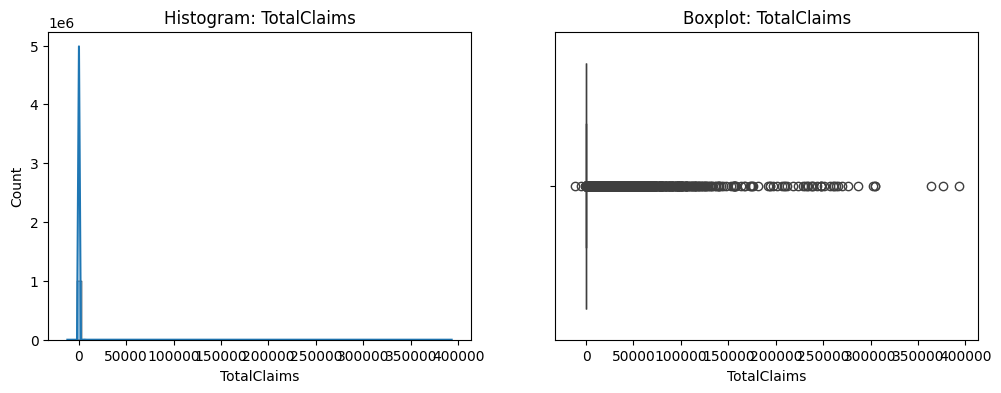

TotalClaims skewness: 69.93, 99th percentile: 0.00, max: 393092.11



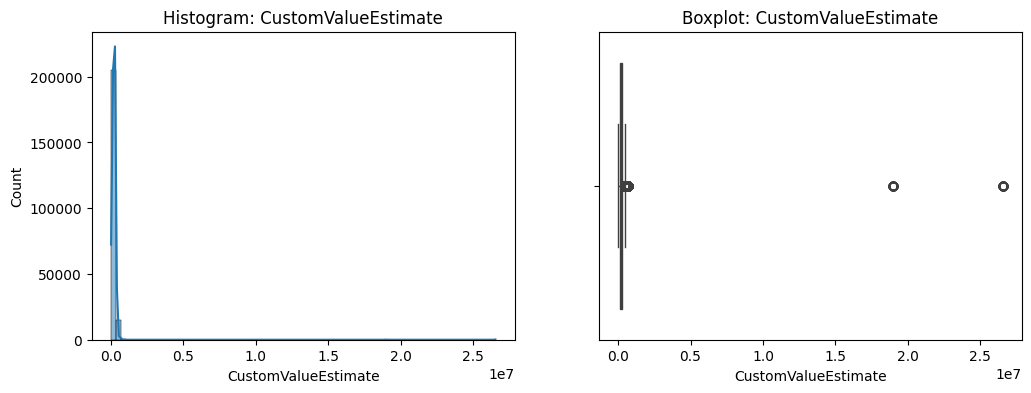

CustomValueEstimate skewness: 40.87, 99th percentile: 450000.00, max: 26550000.00



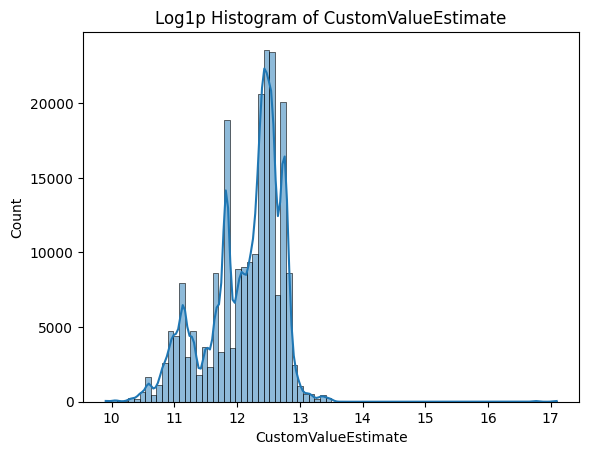

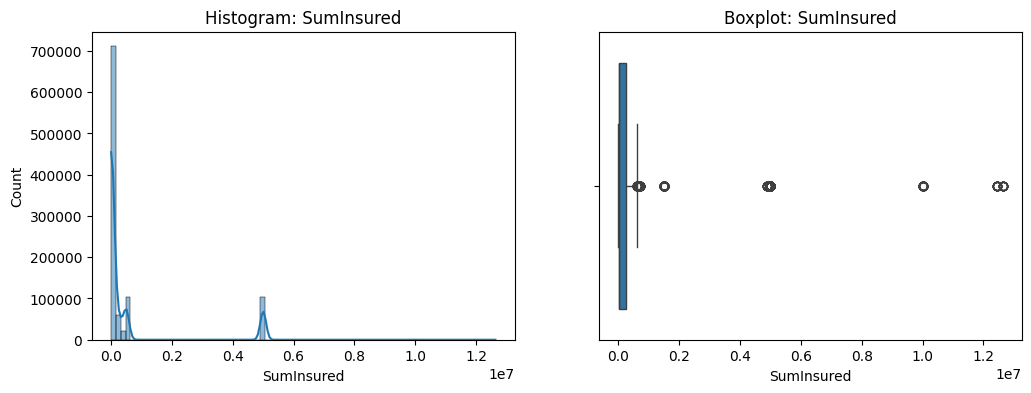

SumInsured skewness: 2.55, 99th percentile: 5000000.00, max: 12636200.00



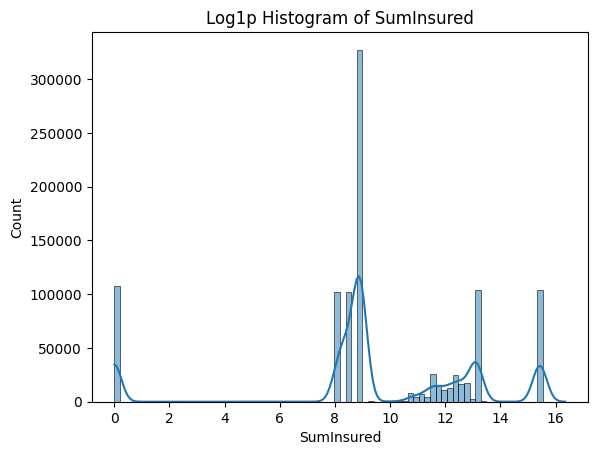

In [35]:
# cell 7 — distributions
num_cols = [c for c in ["TotalPremium","TotalClaims","CustomValueEstimate","SumInsured"] if c in df.columns]
for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), bins=80, kde=True)
    plt.title(f"Histogram: {col}")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot: {col}")
    plt.show()

    # show skewness and top percentiles
    s = df[col].dropna()
    print(f"{col} skewness: {s.skew():.2f}, 99th percentile: {s.quantile(0.99):.2f}, max: {s.max():.2f}\n")

    # log transform sample if heavy skew
    if (s.skew() > 2) and (s.min() > 0):
        plt.figure()
        sns.histplot(np.log1p(s), bins=80, kde=True)
        plt.title(f"Log1p Histogram of {col}")
        plt.show()


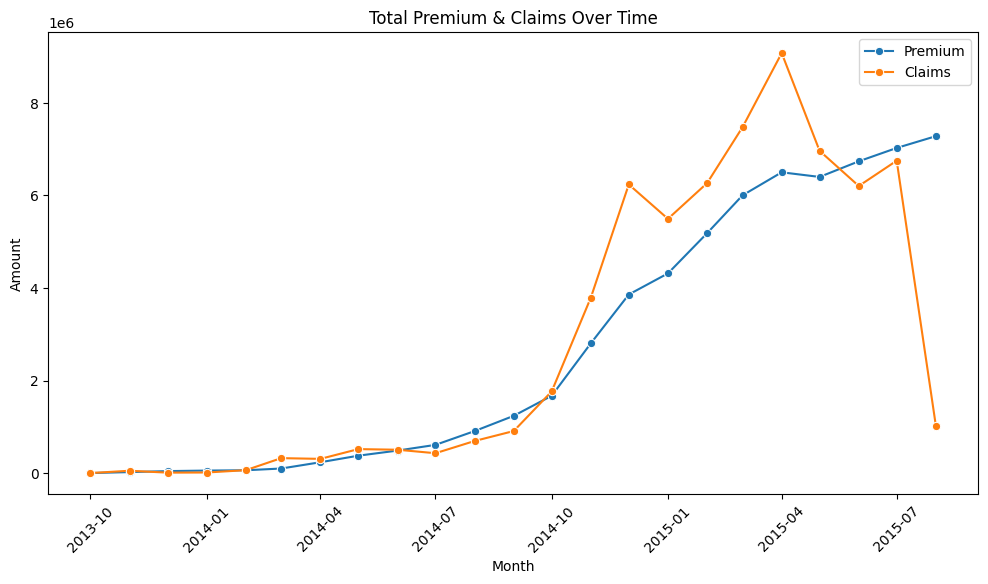

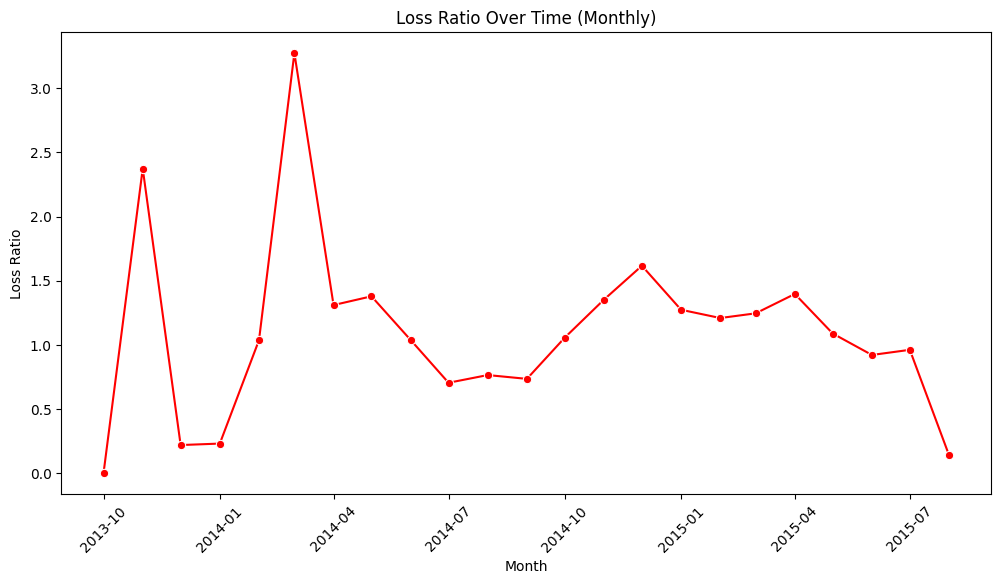

In [37]:
# ------------------------------
# Cell 8 — Temporal aggregation & trends
# ------------------------------

# 1️⃣ Identify a date column
date_col = None
for cand in ["TransactionMonth", "TransactionDate", "PolicyDate"]:
    if cand in df.columns:
        date_col = cand
        break

if date_col:
    # 2️⃣ Convert to datetime and floor to month
    df["period"] = pd.to_datetime(df[date_col], errors="coerce").dt.to_period("M").dt.to_timestamp()

    # 3️⃣ Aggregate by month
    time_agg = (
        df.groupby("period")
          .agg(
              total_premium=("TotalPremium", "sum"),
              total_claims=("TotalClaims", "sum"),
              count_policies=("PolicyID", "nunique") if "PolicyID" in df.columns else ("TotalPremium", "count")
          )
          .reset_index()
    )

    # 4️⃣ Compute Loss Ratio
    time_agg["LossRatio"] = time_agg["total_claims"] / time_agg["total_premium"]

    # 5️⃣ Plot Total Premium & Claims
    plt.figure(figsize=(12,6))
    sns.lineplot(data=time_agg, x="period", y="total_premium", marker='o', label="Premium")
    sns.lineplot(data=time_agg, x="period", y="total_claims", marker='o', label="Claims")
    plt.title("Total Premium & Claims Over Time")
    plt.xlabel("Month")
    plt.ylabel("Amount")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # 6️⃣ Plot Loss Ratio
    plt.figure(figsize=(12,6))
    sns.lineplot(data=time_agg, x="period", y="LossRatio", marker='o', color="red")
    plt.title("Loss Ratio Over Time (Monthly)")
    plt.xlabel("Month")
    plt.ylabel("Loss Ratio")
    plt.xticks(rotation=45)
    plt.show()

else:
    print("No date column found for temporal analysis.")


In [39]:
# cell 9 — makes and models
if "Make" in df.columns:
    make_stats = df.groupby("Make").agg(
        total_claims=("TotalClaims","sum"),
        avg_claim=("TotalClaims","mean"),
        count=("TotalClaims","count")
    ).query("count>=50").sort_values("total_claims", ascending=False)  # threshold to avoid tiny groups
    display(make_stats.head(20))

    # Top 10 worst average claim
    top_avg = df.groupby("Make").agg(avg_claim=("TotalClaims","mean"), count=("TotalClaims","count")).query("count>=50").sort_values("avg_claim", ascending=False)
    display(top_avg.head(10))


In [45]:
df_gender = df.dropna(subset=["TotalPremium", "TotalClaims", "Gender"])
df_gender = df_gender[df_gender["Gender"].isin(["Male","Female"])]

print(df_gender["Gender"].value_counts())


Gender
Male      19324
Female     3404
Name: count, dtype: int64


In [46]:
from scipy import stats

# Keep only valid Gender entries
df_gender = df.dropna(subset=["TotalPremium","TotalClaims","Gender"])
df_gender = df_gender[df_gender["Gender"].isin(["Male","Female"])]

# Compute LossRatio
df_gender["LossRatio"] = df_gender["TotalClaims"] / df_gender["TotalPremium"]

# Split
males = df_gender[df_gender["Gender"]=="Male"]["LossRatio"]
females = df_gender[df_gender["Gender"]=="Female"]["LossRatio"]

# Check sample sizes
if len(males) < 2 or len(females) < 2:
    print(f"❌ Not enough samples to perform statistical tests. Male: {len(males)}, Female: {len(females)}")
else:
    t_stat, p_t = stats.ttest_ind(males, females, equal_var=False, nan_policy='omit')
    u_stat, p_u = stats.mannwhitneyu(males, females, alternative='two-sided')
    print(f"Welch t-test p-value: {p_t:.4e}")
    print(f"Mann-Whitney p-value: {p_u:.4e}")


Welch t-test p-value: 5.4951e-01
Mann-Whitney p-value: 6.3508e-01


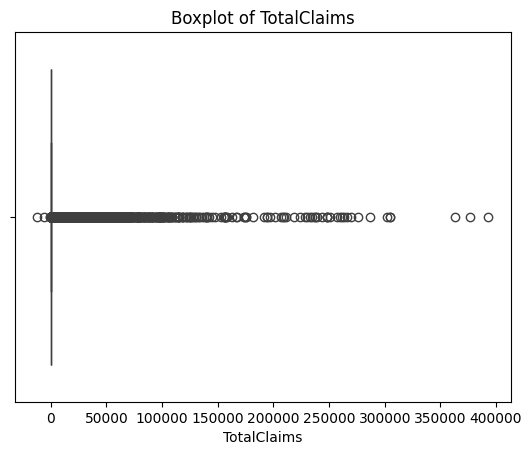

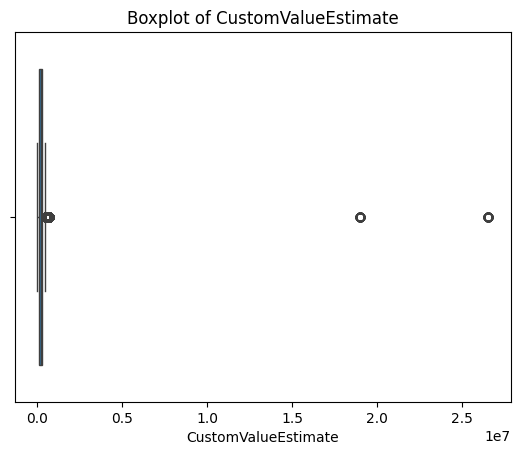

In [52]:
for col in ['TotalClaims','CustomValueEstimate']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


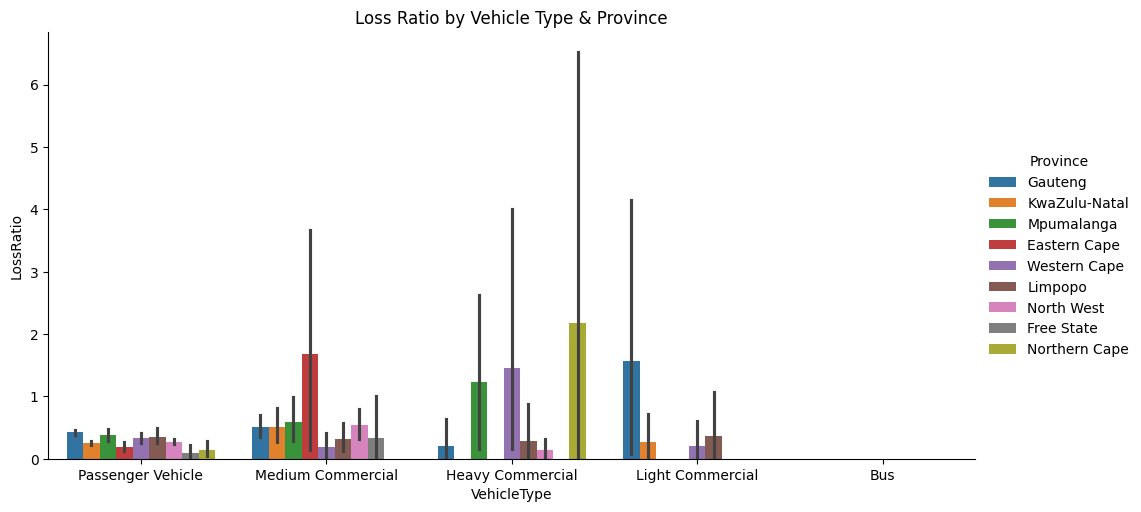

In [53]:
sns.catplot(
    data=df, x='VehicleType', y='LossRatio', hue='Province', kind='bar', height=5, aspect=2
)
plt.title("Loss Ratio by Vehicle Type & Province")
plt.show()
